<a href="https://colab.research.google.com/github/vpagonis/EURADOS-2023/blob/main/Code_2_11_14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# R-CODE 3.1 FITTING CW-OSL DATA WITH THE R-PACKAGE NUMOSL

Here we use the function `decomp` in the R package
`numOSL` by Peng et al. {2016}. This function allows
decomposition of a CW-OSL or LM-OSL decay curve into a given number
of first-order exponential components. The function uses a combination
of the differential evolution and Levenberg-Marquardt algorithms.

The function can analyze both CW-OSL and LM-OSL signals, and is called
according to: 


$\textbf{decomp}$`(Sigdata, delay.off = c(0,0), ncomp = 2, constant =
TRUE, typ ="cw", control.args = list(), weight = FALSE, plot =
TRUE, log = "x", lwd = 2, curve.no = NULL, SAR.Cycle = NULL, irr.dose
= NULL, outfile = NULL, transf = TRUE)` 

where the options are:

$\textbf{Sigdata}$ matrix(required): a two-column matrix (i.e., stimulation
time and photon count values) 

$\textbf{delay.off}$ vector(with default): a two-element vector indicating
the $"Delay"$ and $"Off"$ values of the decay curves

$\textbf{ncomp}$ integer(with default): number of decomposed components
constant 

$\textbf{logical(with}$ default): logical value indicating if a constant
component should be subtracted from the decay curve 

$\textbf{typ}$ character(with default): type of a decay curve

$\textbf{control.args}$ list(with default): arguments used in the differential
evolution algorithm 

$\textbf{weight}$ logical(with default): logical value indicating if the
fit should be performed using a weighted procedure 

$\textbf{plot}$ logical(with default): logical value indicating if the results
should be plotted 

$\textbf{log}$ character(with default): a character string which contains
$"x"$ if the x axis is to be logarithmic, $"y"$ if the y axis is
to be logarithmic and $"xy"$ or $"yx"$ if both axes are to be logarithmic 

$\textbf{lwd}$ numeric(with default): width of curves (lines)


For a CW-OSL decay curve, the fitting model is \cite{Bluszcz and Adamiec, 2006}:

\begin{equation}
I(t)=a1*b1*exp(-b1*t)+...+ak*bk*exp(-bk*t),
\end{equation}

where $k=1,2,...$ indicates the exponential components, $I(t)$ is
the luminescence intensity as a function of time, $a$ is the number
of trapped electrons, and $b$ is the detrapping rate. A constant
component $c$ is added to this equation, if $constant=TRUE$ when
calling the `decomp` function. 

The following R-code shows how to analyze a CW-OSL curve into 2 exponential
components.

In [2]:


install.packages("numOSL")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



[1] Best fit parameters


,Ithn,seIthn,Lamda,seLamda
Comp.1,58290.54,657.5417,0.17560601,0.0016782004
Comp.2,83985.25,697.0983,0.02776155,0.0004630472



FOM= 7.719673

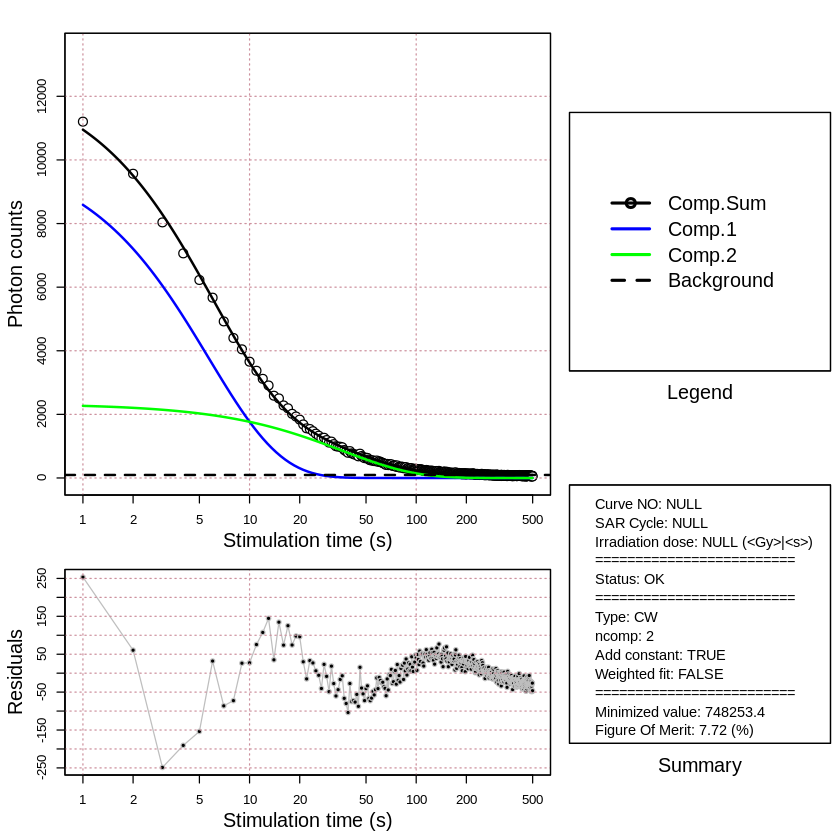

In [3]:
### Fitting CW-OSL signal with package numOSL (2 components)
# install R package tgcd by Peng et al.
library('numOSL')
# Load the data
filename <- "https://github.com/vpagonis/EURADOS-2023/raw/main/KST4ph300IR.TXT"
data <-read.table(url(filename))

data<-data.frame(data[2:500,1],data[2:500,2]) #data t=1-500 s

a<- decomp(data, ncomp=2)
print.noquote("Best fit parameters")
a$LMpars
cat("\nFOM=",a$FOM)


# R-CODE 2.12 Fitting LM-OSL signals using the package numOSL

The `decomp` function previously discussed in this chapter for CW-OSL
signals, can also be used to analyze LM-OSL signals into first order
components.

For a LM-OSL decay curve, the fitting model is {Bulur_2000}: 

\begin{equation}
I(t)=a1*b1*(t/P)*exp[-b1*t^{2}/(2*P)]+...+ak*bk*(t/P)*exp[-bk*t^{2}/(2*P)],
\end{equation}

where k=1, 2, ..., 7, and $I(t)$ is the luminescence intensity as
a function of time, $P$ is the total stimulation time, $a$ is the
number of trapped electrons, and $b$ is the detrapping rate. 

The
constant component for the LM-OSL signal is taken as $c(t/P)$ if `constant=TRUE`.
Parameters are initialized using the differential evolution method
{BluszczAdamiec_2006,Adamiec_2004,Adamiec_2006}, then the Levenberg-Marquardt
algorithm is used to optimize the parameters. 

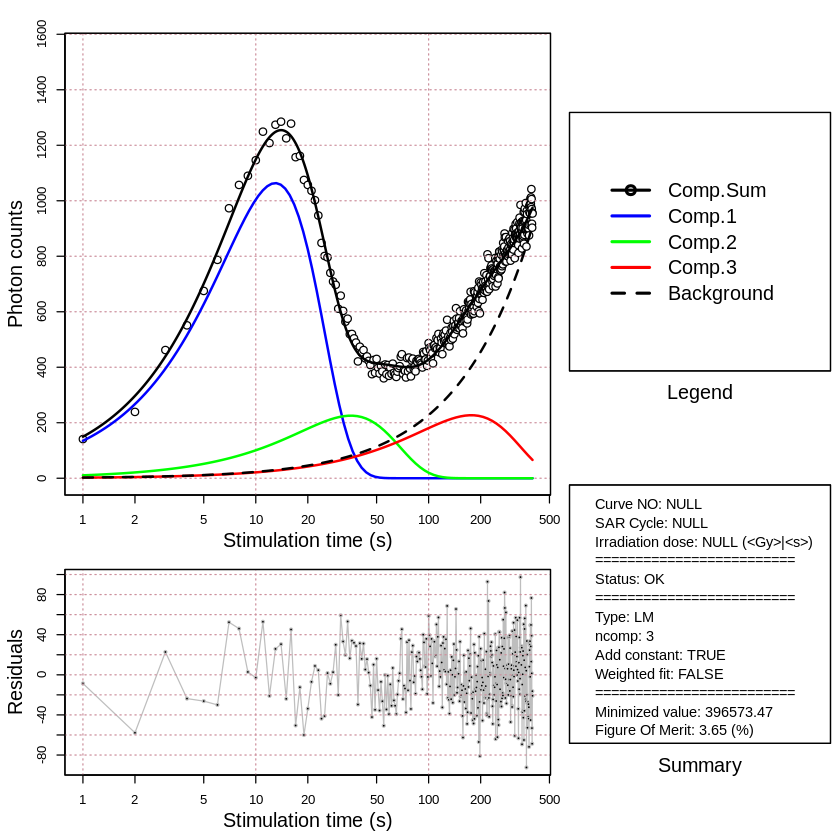

In [4]:
### Example 1: Analyze LM-OSL signal using package numOSL
rm(list=ls())
library("numOSL")
data(Signaldata)
decomp(Signaldata$lm,ncomp=3,typ="lm",
control.args=list(maxiter=10))